# 1. **Data Pre-processing**

In [3]:
## package to import csv file

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
read_csv = pd.read_csv("/content/gdrive/MyDrive/Assignment_3 Data science and network science/emails.csv")
read_csv.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
# example of differents emails

message = ['I am coming to see you',
              "PLEASE don't let me like that!",
              'Mr. TAMO is a True and good farmer',
              'We will choose one number between one, 2 and 11']

When starting an NLP ( Natural Language Processing) project for the first time always remember to install an NLTK ( natural language toolkit) package and import some useful libraries from this package. Below are some examples:

In [6]:
## necessary package

import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# 2- **Exemple of Vectorizer**

We have to clean the data using regex, matching patterns in the e-mail messages, and replace them with more organized counterparts. Cleaner data leads to a more efficient model and higher accuracy. Following steps are involved in pre-processing the messages :

### Lower case every data
### Remove punctuation
### Remove the stops words


In [7]:
# import the method

from sklearn.feature_extraction.text import CountVectorizer

In [8]:
##  initialize our method 

vect = CountVectorizer(stop_words = set(stopwords.words('english')))

In [9]:
vect.fit(message)

CountVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [10]:
## the name of our features call agains tokens

vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['11',
 'choose',
 'coming',
 'farmer',
 'good',
 'let',
 'like',
 'mr',
 'number',
 'one',
 'please',
 'see',
 'tamo',
 'true']

In [11]:
#transform the dataset

message_new = vect.transform(message)
message_new

<4x14 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [12]:
type(message_new)



scipy.sparse.csr.csr_matrix

In [13]:

## recap all the data differents to 0

print(message_new)



  (0, 2)	1
  (0, 11)	1
  (1, 5)	1
  (1, 6)	1
  (1, 10)	1
  (2, 3)	1
  (2, 4)	1
  (2, 7)	1
  (2, 12)	1
  (2, 13)	1
  (3, 0)	1
  (3, 1)	1
  (3, 8)	1
  (3, 9)	2


In [14]:
#convert it to a dense matrix

message_new.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0]])

In [15]:
pd.DataFrame(message_new.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,11,choose,coming,farmer,good,let,like,mr,number,one,please,see,tamo,true
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,0,0,1,1,0,0,1,0,0,0,0,1,1
3,1,1,0,0,0,0,0,0,1,2,0,0,0,0


In [16]:
vect2 = CountVectorizer(stop_words=None)

In [17]:
vect2.fit(message)

CountVectorizer()

In [18]:
vect2.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['11',
 'am',
 'and',
 'between',
 'choose',
 'coming',
 'don',
 'farmer',
 'good',
 'is',
 'let',
 'like',
 'me',
 'mr',
 'number',
 'one',
 'please',
 'see',
 'tamo',
 'that',
 'to',
 'true',
 'we',
 'will',
 'you']

In [19]:
#Total length removal

a=len(vect2.get_feature_names()) # before remove stop words
b=len(vect.get_feature_names()) # after remove stop words
print("Original Length:",a)
print("Cleaned Length:",b)
print("Total Words Removed:",a - b)


Original Length: 25
Cleaned Length: 14
Total Words Removed: 11


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Let us try another method whith TfidfVectorizer method

First of all, we need to put our message on the table

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
df1  = pd.DataFrame(message)
df1.columns =  ['email']
df1

,email
0,I am coming to see you
1,PLEASE don't let me like that!
2,Mr. TAMO is a True and good farmer
3,"We will choose one number between one, 2 and 11"


In [22]:
vect1 = TfidfVectorizer(stop_words = set(stopwords.words('english')))

In [23]:
stop_words=vect1.fit(df1)
stop_words

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [24]:
#tf_vec = TfidfVectorizer()

features = vect1.fit_transform(df1['email'])
X = features

In [25]:
X

<4x14 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [26]:
print(X)

  (0, 11)	0.7071067811865476
  (0, 2)	0.7071067811865476
  (1, 6)	0.5773502691896257
  (1, 5)	0.5773502691896257
  (1, 10)	0.5773502691896257
  (2, 3)	0.4472135954999579
  (2, 4)	0.4472135954999579
  (2, 13)	0.4472135954999579
  (2, 12)	0.4472135954999579
  (2, 7)	0.4472135954999579
  (3, 0)	0.3779644730092272
  (3, 8)	0.3779644730092272
  (3, 9)	0.7559289460184544
  (3, 1)	0.3779644730092272


In [27]:
pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,11,choose,coming,farmer,good,let,like,mr,number,one,please,see,tamo,true
0,0.000000,0.000000,0.707107,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.707107,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.447214,0.447214,0.00000,0.00000,0.447214,0.000000,0.000000,0.00000,0.000000,0.447214,0.447214
3,0.377964,0.377964,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.377964,0.755929,0.00000,0.000000,0.000000,0.000000


Now we can come back to our data set

# 3. **Exploratory Data Analysis**



In this step, we explore data and gain insights such as shape ( form ), structure, type of mail, and percentage of each type.

First, we check the information of the given dataset and extract information about the dataset

In [28]:
del_word= stopwords.words('english')
for word in del_word:
  if word in read_csv.columns:
    read_csv.drop(word, axis=1, inplace=True) # delete the stop word on the columns

In [29]:
print(read_csv.head(5))
print(read_csv.tail(5))

  Email No.  ect  hou  enron  com  ...  military  allowing  ff  dry  Prediction
0   Email 1    1    0      0    0  ...         0         0   0    0           0
1   Email 2   24   27      1    3  ...         0         0   1    0           0
2   Email 3    1    0      0    0  ...         0         0   0    0           0
3   Email 4   22   10      0    0  ...         0         0   0    0           0
4   Email 5   17    9      0    0  ...         0         0   1    0           0

[5 rows x 2868 columns]
       Email No.  ect  hou  enron  com  ...  military  allowing  ff  dry  Prediction
5167  Email 5168    2    0      0    0  ...         0         0   0    0           0
5168  Email 5169   11    3      1    3  ...         0         0   1    0           0
5169  Email 5170    1    0      0    0  ...         0         0   0    0           1
5170  Email 5171    1    0      0    4  ...         0         0   1    0           1
5171  Email 5172    5    2      1    1  ...         0         0   0   

## VIEWING THE DATA SET

In [30]:
## Here we present the 5 first and the 5 last columns.
print(read_csv.head(5))
print(read_csv.tail(5))

  Email No.  ect  hou  enron  com  ...  military  allowing  ff  dry  Prediction
0   Email 1    1    0      0    0  ...         0         0   0    0           0
1   Email 2   24   27      1    3  ...         0         0   1    0           0
2   Email 3    1    0      0    0  ...         0         0   0    0           0
3   Email 4   22   10      0    0  ...         0         0   0    0           0
4   Email 5   17    9      0    0  ...         0         0   1    0           0

[5 rows x 2868 columns]
       Email No.  ect  hou  enron  com  ...  military  allowing  ff  dry  Prediction
5167  Email 5168    2    0      0    0  ...         0         0   0    0           0
5168  Email 5169   11    3      1    3  ...         0         0   1    0           0
5169  Email 5170    1    0      0    0  ...         0         0   0    0           1
5170  Email 5171    1    0      0    4  ...         0         0   1    0           1
5171  Email 5172    5    2      1    1  ...         0         0   0   

In [31]:
## We change the name prediction in label to avoid confusion

read_csv=read_csv.rename(columns={'Prediction' : 'label'})

print(read_csv.head(5))
print(read_csv.tail(5))

  Email No.  ect  hou  enron  com  ...  military  allowing  ff  dry  label
0   Email 1    1    0      0    0  ...         0         0   0    0      0
1   Email 2   24   27      1    3  ...         0         0   1    0      0
2   Email 3    1    0      0    0  ...         0         0   0    0      0
3   Email 4   22   10      0    0  ...         0         0   0    0      0
4   Email 5   17    9      0    0  ...         0         0   1    0      0

[5 rows x 2868 columns]
       Email No.  ect  hou  enron  com  ...  military  allowing  ff  dry  label
5167  Email 5168    2    0      0    0  ...         0         0   0    0      0
5168  Email 5169   11    3      1    3  ...         0         0   1    0      0
5169  Email 5170    1    0      0    0  ...         0         0   0    0      1
5170  Email 5171    1    0      0    4  ...         0         0   1    0      1
5171  Email 5172    5    2      1    1  ...         0         0   0    0      0

[5 rows x 2868 columns]


## Investigating the shape of the dataset

In [32]:
read_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 2868 entries, Email No. to label
dtypes: int64(2867), object(1)
memory usage: 113.2+ MB


In [33]:
print("read_csv has the shape:", read_csv.shape)


read_csv has the shape: (5172, 2868)


In [34]:
## Proceeding with Checking number of Labels i.e. Spam and Non-Spam emails

print("Count of label:n",read_csv['label'].value_counts())

Count of label:n 0    3672
1    1500
Name: label, dtype: int64


Here, we see that 1 stand for Spam mail and 0 stand for not a spam mail.

In [35]:
## Proceeding with Checking Ratio or percentage of Labels i.e. Spam and Non-Spam emails

print("Not a Spam Email Ratio i.e. 0 label:",round(len(read_csv[read_csv['label']
                                      ==0])/len(read_csv['label']),2)*100,"%")
print("Spam Email Ratio that is 1 label:",round(len(read_csv[read_csv['label']
                                      ==1])/len(read_csv['label']),2)*100,"%")

Not a Spam Email Ratio i.e. 0 label: 71.0 %
Spam Email Ratio that is 1 label: 28.999999999999996 %


# 4- **Exploratory Data Analysis**

**Data visualization** is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends and patterns in data.



Visualizing ratio non - Spam/Spam:



<function matplotlib.pyplot.show>

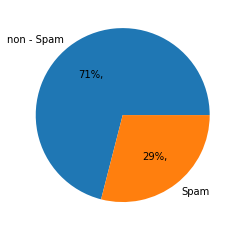

In [36]:
## So we can obtain the percentage of spam and non-spam emails using data visualzation

import matplotlib.pyplot as plt
print("Visualizing ratio non - Spam/Spam:\n")
count = pd.value_counts(read_csv['label'], sort=True) # count the number of 1 and 0
count.plot(kind = 'pie',labels=['non - Spam','Spam'], autopct='%1.0f%%,')
plt.ylabel('')
plt.show

## visualization Word Cloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

In [37]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

(-0.5, 1599.5, 799.5, -0.5)

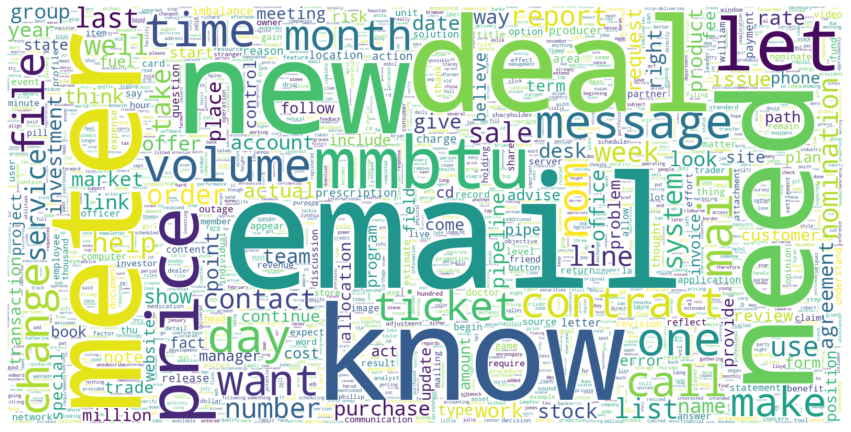

In [38]:
#Now let's add a string value instead to make our Series clean
colt = list(read_csv.columns)
join_word=" ".join(colt)

# Create and generate a word cloud image:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white",  max_words=2000, max_font_size= 300,  width=1600,
               height=800)
wc.generate(join_word)

# Display the generated image:
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [39]:
# Here we split our feature and our prediction to do test and training.

X = read_csv.iloc[:,1:-1] # extract all the features without the the first and the predictiction
Y = read_csv.iloc[:,-1].values   # extract prediction
print(X.shape)
print(Y.shape)



(5172, 2866)
(5172,)


In [40]:
X.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,corp,know,need,forwarded,new,may,j,mmbtu,get,see,price,daren,company,l,let,would,xls,farmer,attached,us,information,message,day,time,one,http,th,volume,mail,contract,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,1,0,0,3,0,0,8,0,2,1,0,3,0,35,0,1,0,3,1,2,0,0,2,2,3,0,15,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,0,0,0,2,0,0,5,0,0,1,0,2,0,27,0,0,0,1,0,0,0,0,1,0,1,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,0,0,0,2,0,0,3,0,1,0,0,1,0,34,0,0,0,0,0,0,0,0,0,0,0,0,12,3,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
Y

array([0, 0, 0, ..., 1, 1, 0])

In [42]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

As we can see above, our dataframe is already in a word count, and each word is a feature (3000 features) in the dataframe.

Looking at the dataframe we see that it is in a way that the word count has an effect on the outcome being spam or non-spam. So we can Split data into test and train and appy Random Forest classifier with the train test split function.

So that will be the first choice to train the model

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
import seaborn as sns


In [44]:
# Splitting data into test and train

train_x, test_x, train_y, test_y = train_test_split (X,Y, test_size=0.21, random_state=42)

We are performing a train test split on the dataset. We are providing the test size as 0.21, that means our training sample contains 4138 training set and test sample contains 1034 test set

# Random Forest classifier

Random forests is a supervised learning algorithm. It can be used both for classification and regression. here we will use it for classification. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       754
           1       0.98      0.92      0.95       333

    accuracy                           0.97      1087
   macro avg       0.98      0.96      0.97      1087
weighted avg       0.97      0.97      0.97      1087

Accuracy Score of Random Forest Classifier :  0.9724011039558418


Text(33.0, 0.5, 'True labels')

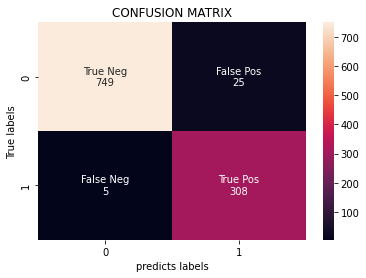

In [45]:
# Random Forest classifier with the train test split function.

#Create a Gaussian Classifier
rfc =  RandomForestClassifier(n_estimators=100, criterion="gini") # number of trees and to measure the quality of a split.

#Train the model using the training sets y_predRFC=rfc.predict(test_x)
rfc.fit(train_x,train_y)

# prediction on test set
y_predRFC = rfc.predict(test_x)

# Model Accuracy, how often is the classifier correct
print(classification_report(y_predRFC, test_y))
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_predRFC,test_y))

# Confusion matrix
cm = confusion_matrix(test_y, y_predRFC)

# gives the name for each group
group_names = ['True Neg','False Pos','False Neg','True Pos']

# count the number of labels of each group and save
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

# assign each value to each group
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names,group_counts)]

# put our confusion matrix in the matrix with 2 rows and 2 columns
labels = np.asarray(labels).reshape(2,2)

#design our matrix with color
sns.heatmap(cm, annot=labels, fmt='')

plt.title('CONFUSION MATRIX')
plt.xlabel('predicts labels')
plt.ylabel('True labels')

# Super Vector Machine

We can also use SVM machine learning

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       771
           1       0.94      0.93      0.93       316

    accuracy                           0.96      1087
   macro avg       0.95      0.95      0.95      1087
weighted avg       0.96      0.96      0.96      1087

Accuracy Score of SVM :  0.9604415823367065


Text(33.0, 0.5, 'True labels')

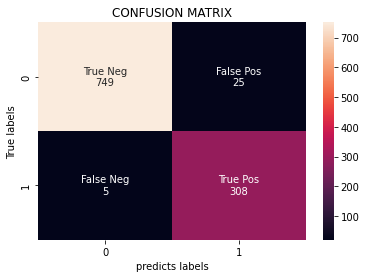

In [46]:
#Create a SVM Classifier
SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

#Train the model using the training sets y_predSVM=rfc.predict(test_x)
SVM.fit(train_x,train_y)

# prediction on test set
y_predSVM = SVM.predict(test_x)

# Model Accuracy, how often is the svm correct
print(classification_report(y_predSVM, test_y))
print("Accuracy Score of SVM : ", accuracy_score(y_predSVM,test_y))

# Confusion matrix
cm_svm = confusion_matrix(test_y, y_predSVM)
group_names_svm = ['True Neg','False Pos','False Neg','True Pos']
group_counts_svm = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names_svm,group_counts_svm)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_svm, annot=labels, fmt='')
plt.title('CONFUSION MATRIX')
plt.xlabel('predicts labels')
plt.ylabel('True labels')

# Artificial Neural Network

Artificial Neural Networks(ANN) are part of supervised machine learning where we will be having input as well as corresponding output present in our dataset. From the perspective of this blog, we will be developing an ANN for solving the classification class of our problems and compare it to others methods.

In [47]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#Initialising ANN
ANN = Sequential()

 Once we initialize our ann, we are now going to create layers for the same. Here we are going to create a network 
that will have 2 hidden layers, 1 input layer, and 1 output layer. So, let’s create our very first hidden layer

1. units:- number of neurons that will be present in the respective layer
2. activation:- specify which activation function to be used

In [48]:
#Adding First Hidden Layer
# we will use “relu”[rectified linear unit] as an activation function for hidden layers.
ANN.add(Dense(units=6,activation="relu")) 

#Adding Second Hidden Layer 
ANN.add(Dense(units=6,activation="relu"))

#Adding Output Layer
ANN.add(Dense(units=1,activation="sigmoid"))

#Compiling ANN
#1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent.
#2. loss:- specifies which loss function should be used.
#3.  metrics:- which performance metrics to be used in order to compute performance

ANN.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

x_train = np.array(train_x) # Put train_x in a matrix

#Fitting ANN
# 1.batch_size: how many observations should be there in the batch. Usually, 
        #the value for this parameter is 32 
# 2. epochs: How many times neural networks will be trained. Here the optimal value that 
      #we have found from our experience is 100.

ANN.fit(x_train, train_y,batch_size=32,epochs = 15)

Epoch 1/15
128/128 [==============================] - 1s 3ms/step - loss: 0.6422 - accuracy: 0.6947
Epoch 2/15
128/128 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.7153
Epoch 3/15
128/128 [==============================] - 0s 3ms/step - loss: 0.1992 - accuracy: 0.9503
Epoch 4/15
128/128 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9770
Epoch 5/15
128/128 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9873
Epoch 6/15
128/128 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9865
Epoch 7/15
128/128 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9929
Epoch 8/15
128/128 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9946
Epoch 9/15
128/128 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9951
Epoch 10/15
128/128 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9958

In [49]:
accuracy_score=ANN.evaluate(x_train,train_y)

128/128 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9993


In [50]:
x_test = np.array(test_x)
accuracy_score=ANN.evaluate(x_test,test_y)

34/34 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9798
